In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [102]:
df = pd.read_csv('../java-tasks/results.csv')
df

,benchmark,run,result
0,quadratic,baseline,785
1,quadratic,tdce,783
2,quadratic,lvnTdce,509
3,primes-between,baseline,574100
4,primes-between,tdce,574100
...,...,...,...
205,eight-queens,tdce,959702
206,eight-queens,lvnTdce,959702
207,binary-search,baseline,78
208,binary-search,tdce,75


In [103]:
df = df.replace("incorrect", 0)
df = df.replace("timeout", 0)
df

,benchmark,run,result
0,quadratic,baseline,785
1,quadratic,tdce,783
2,quadratic,lvnTdce,509
3,primes-between,baseline,574100
4,primes-between,tdce,574100
...,...,...,...
205,eight-queens,tdce,959702
206,eight-queens,lvnTdce,959702
207,binary-search,baseline,78
208,binary-search,tdce,75


In [104]:
df = df.pivot(index='benchmark', columns='run', values='result')
df = df.applymap(float)
df

run,baseline,lvnTdce,tdce
benchmark,,,
ackermann,1464231.0,1464231.0,1464231.0
adj2csr,56629.0,56629.0,56629.0
adler32,6851.0,6851.0,6851.0
armstrong,133.0,133.0,133.0
binary-fmt,100.0,100.0,100.0
...,...,...,...
sum-sq-diff,3038.0,2133.0,3038.0
totient,253.0,253.0,253.0
two-sum,98.0,85.0,88.0


In [49]:
df.transform

Index(['baseline', 'lvnTdce', 'tdce'], dtype='object', name='run')

In [105]:
def frac(series):
    if series['baseline'] != 0:
        series['lvnTdce'] = series['lvnTdce']/series['baseline']
        series['tdce'] = series['tdce'] / series['baseline']
        series['baseline'] = 1.0

In [89]:
df['ackermann']['tdce']

1464231

In [88]:
df2 = df

In [106]:
df.apply(axis=1, func=frac)

benchmark
ackermann      None
adj2csr        None
adler32        None
armstrong      None
binary-fmt     None
               ... 
sum-sq-diff    None
totient        None
two-sum        None
up-arrow       None
vsmul          None
Length: 70, dtype: object

In [107]:
df

run,baseline,lvnTdce,tdce
benchmark,,,
ackermann,1.0,1.000000,1.000000
adj2csr,1.0,1.000000,1.000000
adler32,1.0,1.000000,1.000000
armstrong,1.0,1.000000,1.000000
binary-fmt,1.0,1.000000,1.000000
...,...,...,...
sum-sq-diff,1.0,0.702107,1.000000
totient,1.0,1.000000,1.000000
two-sum,1.0,0.867347,0.897959


<AxesSubplot:xlabel='benchmark'>

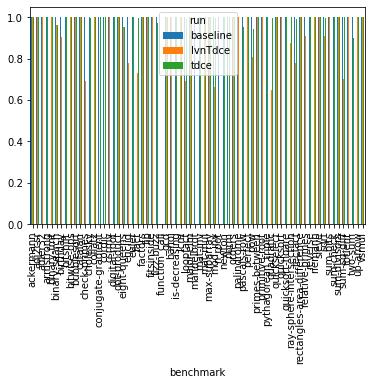

In [109]:
df.plot( kind='bar')